In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft
%matplotlib inline

In [46]:
# data with 0.05mm increments mirrored at the central maxima 

FP_df = pd.read_excel('FP_contrast.xlsx', usecols='A:B', index_col=0)

FP_df = FP_df.sort_index()

FP_df

,Contrast/V
Airgap/mm,
9.50,2.04
9.55,1.44
9.60,3.60
9.65,2.52
9.70,2.52
9.75,1.70
9.80,1.20
9.85,0.60
9.90,2.28


<AxesSubplot:title={'center':'FP Fringes'}, xlabel='Airgap/mm', ylabel='Contrast /V'>

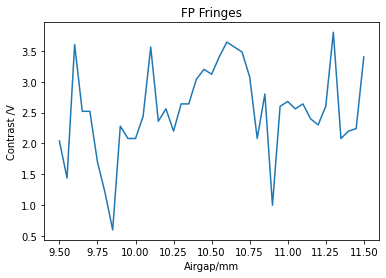

In [47]:
FP_df.plot(title='FP Fringes', legend=False, ylabel='Contrast /V')

In [48]:
# first we must find out some stuff about our data 

N = len(FP_df)

SAMPLE_RATE = 0.1 # mm

# use Nquist to quanitfy what is the max freq that can vbe measured 

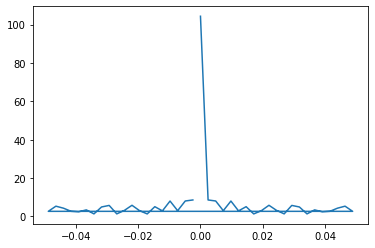

In [49]:
yf = fft(list(FP_df['Contrast/V']))
xf = fftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

# Second set of results - 0.08mm spacings

In [14]:
# data with 0.05mm increments mirrored at the central maxima 
# g7 and i7 

FP_df2 = pd.read_excel('FP_contrast2.xlsx', usecols='G,I' , index_col=0) #, skiprows='1:6')

# FP_df2 = FP_df2.sort_index()

FP_df2.head()

,Peak-to-Peak/V
Airgap/mm,
8.00,2.24
8.08,2.04
8.16,2.24
8.24,2.12
8.32,2.08


<AxesSubplot:title={'center':'FP Fringes second attempt'}, xlabel='Airgap/mm', ylabel='Peak-to-Peak /V'>

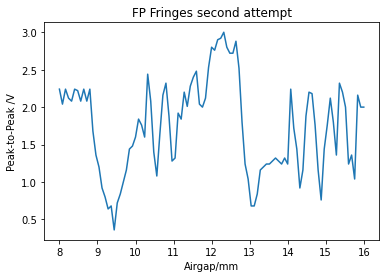

In [15]:
FP_df2.plot(title='FP Fringes second attempt', legend=False, ylabel='Peak-to-Peak /V')

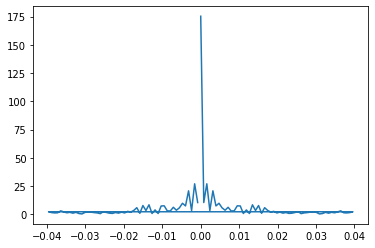

In [16]:
N2 = len(FP_df2)
SAMPLE_RATE2 = 0.08 # mm

yf = fft(list(FP_df2['Peak-to-Peak/V']))
xf = fftfreq(N2, 1/SAMPLE_RATE2)

plt.plot(xf, np.abs(yf))
plt.show()

In [17]:
len(fftfreq(N2, 1/SAMPLE_RATE2))

101

In [18]:
# now we are going to use peak-to-peak/mean voltage

FP_df3 = pd.read_excel('FP_contrast2.xlsx', usecols='G:I' , index_col=0) #, skiprows='1:6')

# FP_df2 = FP_df2.sort_index()

FP_df3.head()

,Mean/V,Peak-to-Peak/V
Airgap/mm,,
8.00,1.56,2.24
8.08,1.52,2.04
8.16,1.52,2.24
8.24,1.57,2.12
8.32,1.51,2.08


In [26]:
FP_df3['Peak-to-Peak/V'] = FP_df3['Peak-to-Peak/V'] / (2* FP_df3['Mean/V'])

KeyError: 'Mean/V'

In [24]:
FP_df3 = FP_df3.drop(['Mean/V'], axis=1)



KeyError: "['Mean/V'] not found in axis"

<AxesSubplot:title={'center':'FP Fringes second attempt'}, xlabel='Airgap/mm', ylabel='Peak-to-Peak /V'>

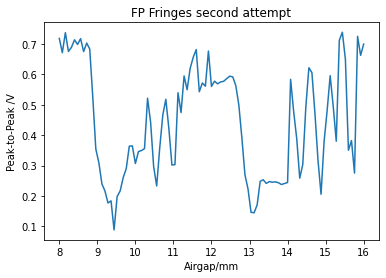

In [57]:
FP_df3.plot(title='FP Fringes second attempt', legend=False, ylabel='Peak-to-Peak /V')

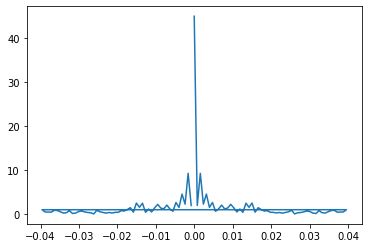

In [58]:
yf = fft(list(FP_df3['Peak-to-Peak/V']))
plt.plot(xf, np.abs(yf))
plt.show()

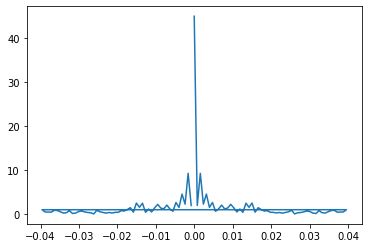

In [61]:
yf = fft(list(FP_df3['Peak-to-Peak/V']))
plt.plot(xf, np.abs(yf))
plt.show()

# Final Fabry-Perot mesures with 0.04mm spacing 

In [61]:
# data with 0.05mm increments mirrored at the central maxima 
# g7 and i7 

FP_dffinal = pd.read_excel('FP_contrast_final.xlsx', usecols='Q:T' , index_col=0, skiprows='1,2,3')

# FP_df2 = FP_df2.sort_index()

FP_dffinal

,Peak-to-Peak/V,Mean/V,Contrast.1
Airgap/mm,,,
9.48,2.52,3.19,0.394984
9.52,2.36,3.24,0.364198
9.56,1.80,3.17,0.283912
9.60,1.36,3.16,0.215190
9.64,2.00,3.17,0.315457
...,...,...,...
6.64,2.76,3.08,0.448052
6.60,2.76,2.99,0.461538
6.56,2.88,2.97,0.484848


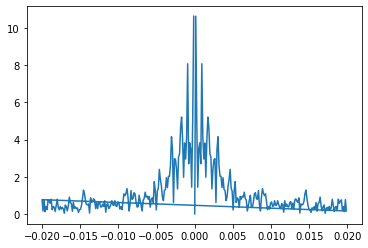

In [60]:
N_FINAL = len(FP_dffinal)
SAMPLE_RATE_FINAL = 0.04 # mm

yf = fft(list(FP_dffinal['Contrast.1']-FP_dffinal['Contrast.1'].mean()))
xf = fftfreq(N_FINAL, 1/SAMPLE_RATE_FINAL)

plt.plot(xf, np.abs(yf))
plt.show()

In [59]:
FP_dffinal['Contrast.1'].mean()

0.40190412680288307